# Capstone Project - Music Data Analysis - Clustering

In [61]:
# Usual imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('FinalData.csv', sep=',')
df.head()

,ID,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Artists,Popularity
0,6J2VvzKwWc2f0JP5RQVZjq,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,celticmetal,The HU,55
1,4HA34COgxgVJ6zK88UN4Ik,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,celticmetal,Gloryhammer,21
2,3W6Xik6Xxf06JuUoZSATlD,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,celticmetal,Orion's Reign,2
3,2gGveBaLJQMtJ43X4UL5kH,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,celticmetal,Brothers of Metal,50
4,1lRF81A1C9QoCgBcEop2zg,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,celticmetal,Powerwolf,22


In [63]:
# Just to make sure, we check if there are any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121815 entries, 0 to 121814
Data columns (total 18 columns):
ID                  121815 non-null object
Name                121815 non-null object
Danceability        121815 non-null float64
Energy              121815 non-null float64
Key                 121815 non-null float64
Loudness            121815 non-null float64
Mode                121815 non-null float64
Speechness          121815 non-null float64
Acousticness        121815 non-null float64
Instrumentalness    121815 non-null float64
Liveness            121815 non-null float64
Valence             121815 non-null float64
Tempo               121815 non-null float64
Duration_ms         121815 non-null float64
time_signature      121815 non-null float64
Genre               121815 non-null object
Artists             121808 non-null object
Popularity          121815 non-null int64
dtypes: float64(13), int64(1), object(4)
memory usage: 16.7+ MB


In [64]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121808 entries, 0 to 121814
Data columns (total 18 columns):
ID                  121808 non-null object
Name                121808 non-null object
Danceability        121808 non-null float64
Energy              121808 non-null float64
Key                 121808 non-null float64
Loudness            121808 non-null float64
Mode                121808 non-null float64
Speechness          121808 non-null float64
Acousticness        121808 non-null float64
Instrumentalness    121808 non-null float64
Liveness            121808 non-null float64
Valence             121808 non-null float64
Tempo               121808 non-null float64
Duration_ms         121808 non-null float64
time_signature      121808 non-null float64
Genre               121808 non-null object
Artists             121808 non-null object
Popularity          121808 non-null int64
dtypes: float64(13), int64(1), object(4)
memory usage: 17.7+ MB


In [65]:
# Eliminating 3 out the 4 categorical columns - because we don't really need them for the analyses.
# Eliminating the ID, Name and Artists column. 
df = df.drop(columns = ['ID', 'Name', 'Artists'])
df.head()

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature,Genre,Popularity
0,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,282920.0,4.0,celticmetal,55
1,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,300320.0,4.0,celticmetal,21
2,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,175353.0,4.0,celticmetal,2
3,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,272292.0,4.0,celticmetal,50
4,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,237933.0,4.0,celticmetal,22


In [66]:
df_sample = df[0:10000]
df_sample.shape

(10000, 15)

In [67]:
new_sample = pd.get_dummies(df_sample)
cols = new_sample.columns
for i in range(0, len(cols)):
    print(cols[i])

Danceability
Energy
Key
Loudness
Mode
Speechness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
time_signature
Popularity
Genre_albanianhiphop
Genre_balkantrap
Genre_balletclass
Genre_belgianpop
Genre_canadianpop
Genre_celticmetal
Genre_deepchill-out
Genre_deepcomedy
Genre_dronemetal
Genre_e6fi
Genre_ghanaianhiphop
Genre_groovemetal
Genre_khmer
Genre_lapop
Genre_modernblues
Genre_ostrock
Genre_persiantraditional
Genre_pianoblues
Genre_portuguesefolk
Genre_psychill
Genre_runefolk
Genre_slovakindie
Genre_slovakrock


In [68]:
# We will work on a copy of the original DF, so that we ahve the original data intact, for later reference (if needed)
masked_df = df.copy()

# We get the features based on the getDummies() method, to convert the categorical 'Genre' column into features with binary values.
masked_df = pd.get_dummies(masked_df)
masked_df.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
       ...
       'Genre_welshchoir', 'Genre_welshindie', 'Genre_welshmetal',
       'Genre_westernmassindie', 'Genre_witchhouse', 'Genre_worship',
       'Genre_wrock', 'Genre_yugoslavrock', 'Genre_zapstep', 'Genre_zeuhl'],
      dtype='object', length=639)

### We have fully numerical data, with the 'Genre' column transformed into features. 

In [69]:
masked_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121808 entries, 0 to 121814
Columns: 639 entries, Danceability to Genre_zeuhl
dtypes: float64(13), int64(1), uint8(625)
memory usage: 86.5 MB


### Now to apply K-Means on our data

In [70]:
# Imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import time

In [71]:
data = masked_df[0:10000].values
type(data)

numpy.ndarray

time taken: 63.15546178817749


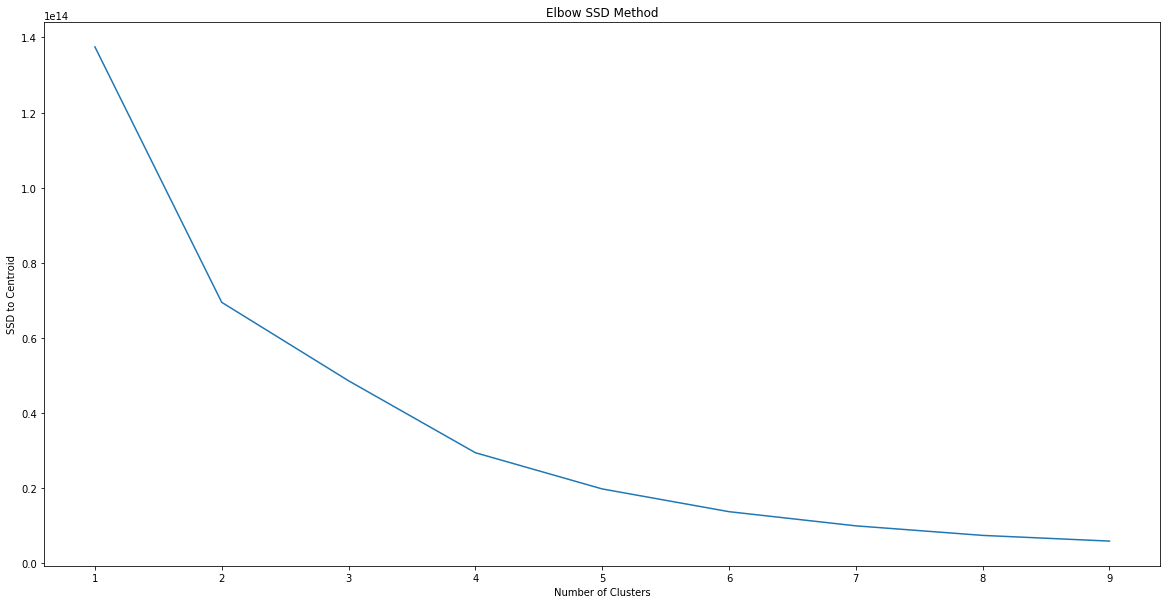

In [72]:
# test
k_range = range(1, 10)

sumOfSquares = []
labels = []

start = time.time()

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    x = model.predict(data)
    labels.append(x)
    y = model.inertia_
    sumOfSquares.append(y)
    
end = time.time()
print("time taken:", end - start)

plt.plot(k_range, sumOfSquares)
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD to Centroid")
plt.title("Elbow SSD Method")
plt.show()

time taken: 1068.3652973175049


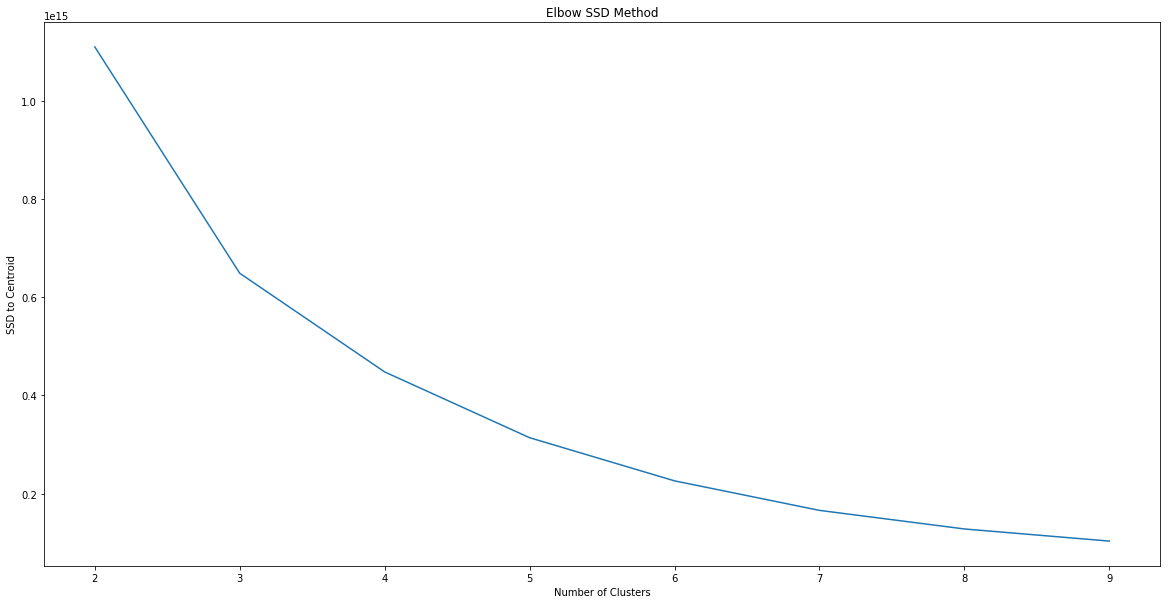

In [73]:
# We can start with an arbitrary value of K upto 10. 

data = masked_df.values

k_range = range(2, 10)

sumOfSquares = []
labels = []

start = time.time()

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    labels.append(model.predict(data))
    sumOfSquares.append(model.inertia_)
    
end = time.time()
totalTime = end - start
print("time taken:", totalTime)

plt.plot(k_range, sumOfSquares)
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD to Centroid")
plt.title("Elbow SSD Method")
plt.show()

time taken: 3981.929925441742


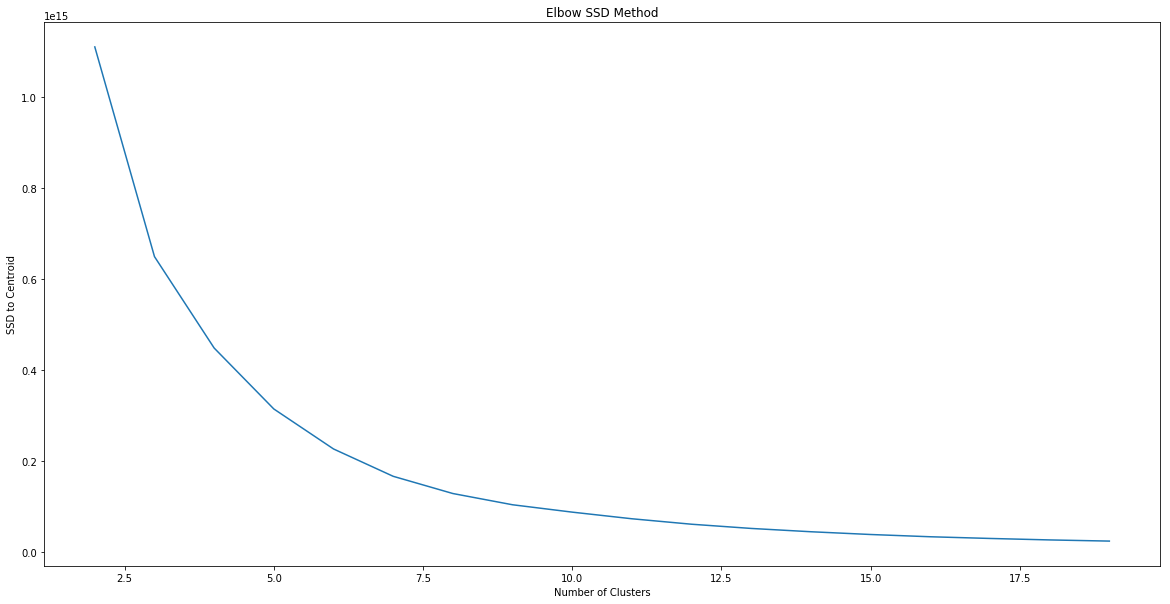

In [31]:
# We can start with an arbitrary value of K upto 20. 

data = masked_df.values

k_range = range(2, 20)

sumOfSquares = []
labels = []

start = time.time()

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    labels.append(model.predict(data))
    sumOfSquares.append(model.inertia_)
    
end = time.time()
totalTime = end - start
print("time taken:", totalTime)

plt.plot(k_range, sumOfSquares)
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD to Centroid")
plt.title("Elbow SSD Method")
plt.show()

In [32]:
print("time taken for 20 clusters: ", totalTime/60, " mins")

time taken for 20 clusters:  66.36549875736236  mins


### Inferences based on the "Elbow" method:
* Though there does seem to be an "elbow" like curve, there isn't a clear inflection point.
* Based on the curve, we could choose anywhere between 5 and 10 clusters.
* Since the variability reduces overall, near around 10, we could choose K = 10.

In [74]:
# Continuing on with K = 10
data = masked_df.values

start = time.time()

model = KMeans(n_clusters=10)
model.fit(data)
y_predicted = model.predict(data)
cc = model.cluster_centers_
sse = model.inertia_
labels = model.labels_

end = time.time()
totalTime = end - start

In [75]:
print("time taken for 10 clusters: ", totalTime/60, " mins")

time taken for 10 clusters:  3.127452349662781  mins


In [86]:
len(y_predicted)

121808

In [87]:
masked_df.shape

(121808, 639)

In [88]:
print(cc)
len(cc)

[[ 5.67226952e-01  6.70834491e-01  5.30957509e+00 ...  1.11891242e-04
   1.48255895e-03  2.32174327e-03]
 [ 5.50208539e-01  6.52906480e-01  5.51957080e+00 ...  5.28548559e-19
   9.80118764e-17  1.04276863e-02]
 [ 4.74351905e-01  3.96552857e-01  5.55238095e+00 ...  1.76182853e-19
   5.42101086e-19  4.76190476e-02]
 ...
 [ 4.53804842e-01  5.85644093e-01  5.37048881e+00 ...  4.56829603e-04
  -4.09828421e-17  2.55824577e-02]
 [ 5.36462155e-01  6.55382442e-01  5.32626389e+00 ...  4.65094647e-05
   7.90660899e-04  4.41839914e-03]
 [ 5.76035746e-01  6.58408454e-01  5.29788463e+00 ...  6.07865783e-05
   1.09415841e-03  2.21871011e-03]]


10

In [89]:
print(labels)
len(labels)

[8 8 9 ... 9 9 0]


121808

In [90]:
sse

87342011491611.2

In [91]:
data.shape

(121808, 639)

In [104]:
data[0:5, 0:19]

array([[ 6.24000e-01,  8.57000e-01,  1.00000e+01, -6.25000e+00,
         0.00000e+00,  5.42000e-02,  2.08000e-02,  2.06000e-01,
         1.10000e-01,  3.24000e-01,  1.31926e+02,  2.82920e+05,
         4.00000e+00,  5.50000e+01,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 5.17000e-01,  9.16000e-01,  0.00000e+00, -4.93300e+00,
         1.00000e+00,  5.59000e-02,  1.82000e-04,  1.91000e-03,
         3.06000e-01,  4.44000e-01,  1.35996e+02,  3.00320e+05,
         4.00000e+00,  2.10000e+01,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 2.51000e-01,  8.94000e-01,  8.00000e+00, -4.10300e+00,
         0.00000e+00,  5.70000e-02,  1.44000e-02,  0.00000e+00,
         1.23000e-01,  2.97000e-01,  1.14223e+02,  1.75353e+05,
         4.00000e+00,  2.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00],
       [ 4.69000e-01,  7.43000e-01,  1.00000e+00, -5.57000e+00,
         0.0000

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [105]:
dataScaled = data.copy()
dataScaled = StandardScaler().fit_transform(dataScaled)
dataScaled[0:5, 0:19]

array([[ 0.38635314,  0.84734803,  1.31364585,  0.478758  , -1.26612352,
        -0.29363747, -0.7683646 , -0.08649877, -0.51236122, -0.53546093,
         0.34467756,  0.21955165,  0.23263739,  1.32601558, -0.04024822,
        -0.03511359, -0.0390012 , -0.06898919, -0.03546343],
       [-0.19588461,  1.08671399, -1.48832262,  0.75265136,  0.78981236,
        -0.27655893, -0.8321114 , -0.66001596,  0.69465172, -0.08408195,
         0.48523043,  0.35531444,  0.23263739, -0.18683534, -0.04024822,
        -0.03511359, -0.0390012 , -0.06898919, -0.03546343],
       [-1.64331678,  0.99745888,  0.75325216,  0.92526449, -1.26612352,
        -0.26550812, -0.78815214, -0.66538328, -0.43230424, -0.6370212 ,
        -0.2666756 , -0.61973546,  0.23263739, -1.03225203, -0.04024822,
        -0.03511359, -0.0390012 , -0.06898919, -0.03546343],
       [-0.45707538,  0.38484431, -1.20812577,  0.62017599, -1.26612352,
        -0.56488473, -0.8258103 , -0.66507136,  0.50990484,  0.05509324,
        -1.208

In [110]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data)
principalDF = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
principalDF.head()

,Principal Component 1,Principal Component 2
0,28138.775970,9.230578
1,45538.776487,14.420926
2,-79428.223114,-7.139812
3,17510.776211,-35.568965
4,-16848.223485,4.206332


In [111]:
finalDF = principalDF.copy()
finalDF['Cluster'] = y_predicted
finalDF.head()

,Principal Component 1,Principal Component 2,Cluster
0,28138.775970,9.230578,8
1,45538.776487,14.420926,8
2,-79428.223114,-7.139812,9
3,17510.776211,-35.568965,8
4,-16848.223485,4.206332,0


In [112]:
finalDF.shape

(121808, 3)

In [121]:
finalDF.describe()

,Principal Component 1,Principal Component 2,Cluster
count,1.218080e+05,1.218080e+05,121808.000000
mean,-8.177514e-11,1.623338e-14,4.862447
std,1.281652e+05,2.897149e+01,3.826558
min,-2.512052e+05,-1.237154e+02,0.000000
25%,-6.371422e+04,-2.218517e+01,0.000000
50%,-2.518122e+04,-7.875705e-01,6.000000
75%,3.227178e+04,1.765969e+01,9.000000
max,5.695105e+06,1.267573e+02,9.000000


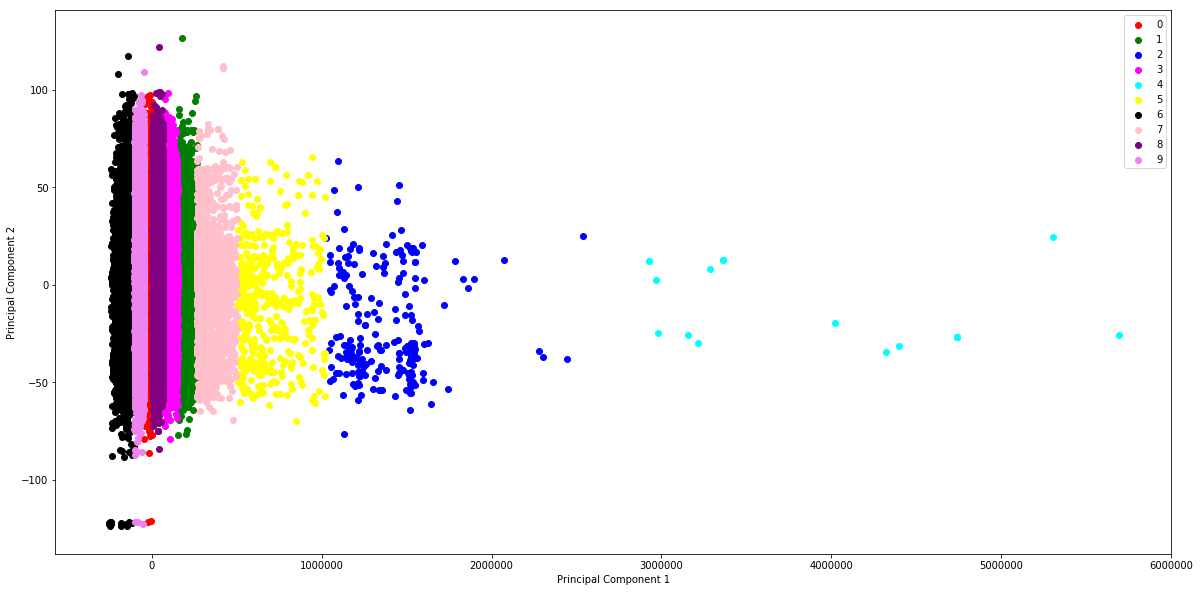

In [124]:
colors = ['red', 'green', 'blue', 'magenta', 'cyan', 'yellow', 'black', 'pink', 'purple', 'violet']

# targets also called labels
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for target, color in zip(targets, colors):
    inds = finalDF.Cluster == target
    plt.scatter(finalDF.loc[inds, 'Principal Component 1'], finalDF.loc[inds, 'Principal Component 2'], c = color)
    #plt.xlim(-500000, 6000000)  
    #plt.legend(targets)
    #plt.show()
  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.show()

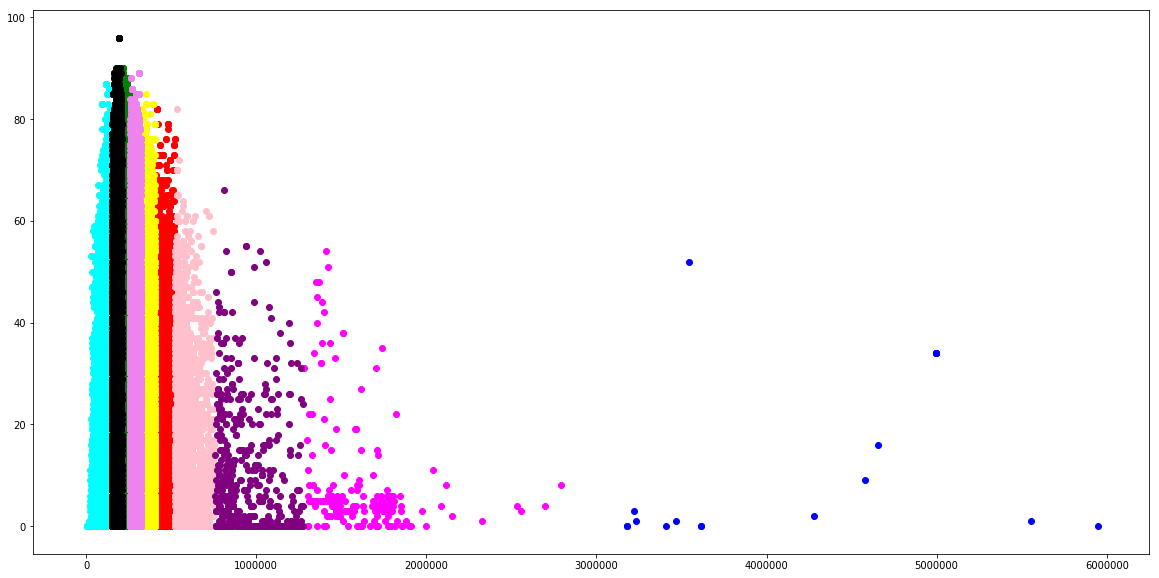

In [57]:
plt.scatter(df1.Duration_ms, df1.Popularity, color='red')
plt.scatter(df2.Duration_ms, df2.Popularity, color='green')
plt.scatter(df3.Duration_ms, df3.Popularity, color='blue')
plt.scatter(df4.Duration_ms, df4.Popularity, color='magenta')
plt.scatter(df5.Duration_ms, df5.Popularity, color='cyan')
plt.scatter(df6.Duration_ms, df6.Popularity, color='yellow')
plt.scatter(df7.Duration_ms, df7.Popularity, color='black')
plt.scatter(df8.Duration_ms, df8.Popularity, color='pink')
plt.scatter(df9.Duration_ms, df9.Popularity, color='purple')
plt.scatter(df10.Duration_ms, df10.Popularity, color='violet')
plt.show()

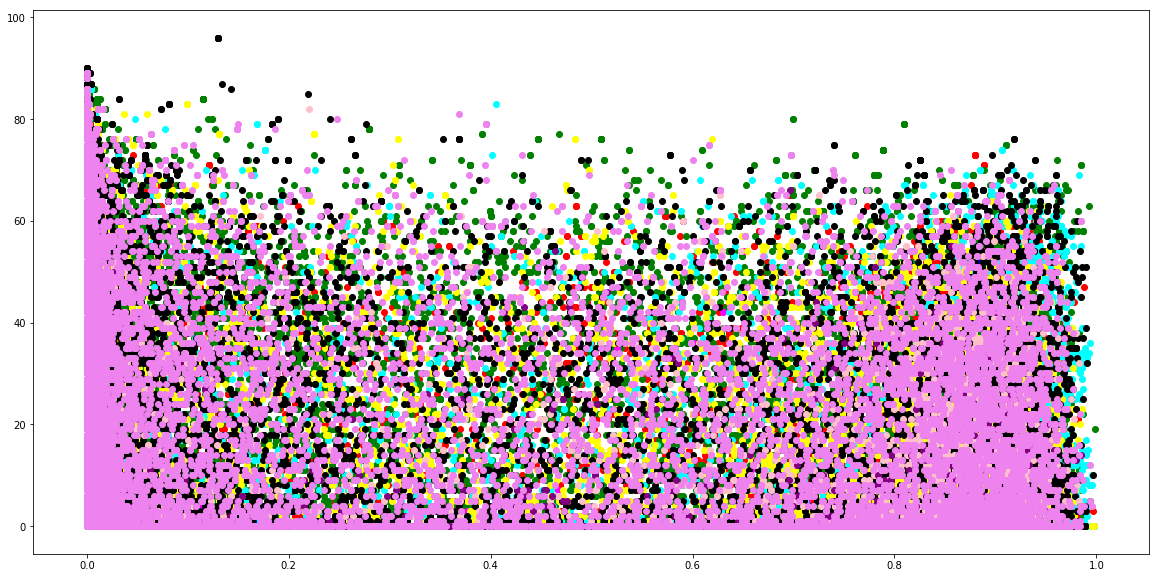

In [58]:
plt.scatter(df1.Instrumentalness, df1.Popularity, color='red')
plt.scatter(df2.Instrumentalness, df2.Popularity, color='green')
plt.scatter(df3.Instrumentalness, df3.Popularity, color='blue')
plt.scatter(df4.Instrumentalness, df4.Popularity, color='magenta')
plt.scatter(df5.Instrumentalness, df5.Popularity, color='cyan')
plt.scatter(df6.Instrumentalness, df6.Popularity, color='yellow')
plt.scatter(df7.Instrumentalness, df7.Popularity, color='black')
plt.scatter(df8.Instrumentalness, df8.Popularity, color='pink')
plt.scatter(df9.Instrumentalness, df9.Popularity, color='purple')
plt.scatter(df10.Instrumentalness, df10.Popularity, color='violet')
plt.show()

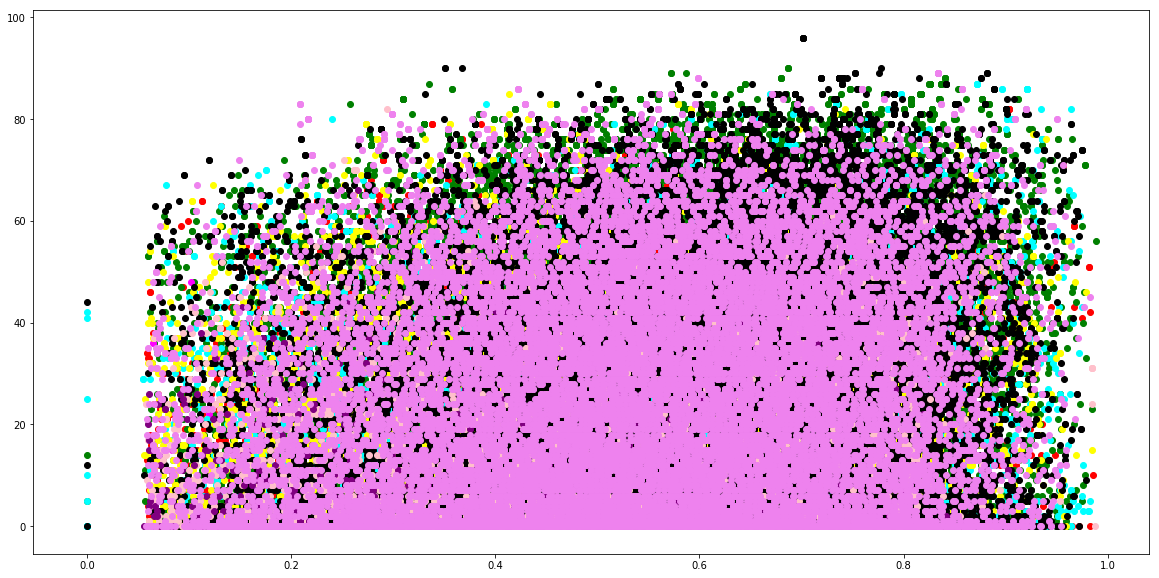

In [59]:
plt.scatter(df1.Danceability, df1.Popularity, color='red')
plt.scatter(df2.Danceability, df2.Popularity, color='green')
plt.scatter(df3.Danceability, df3.Popularity, color='blue')
plt.scatter(df4.Danceability, df4.Popularity, color='magenta')
plt.scatter(df5.Danceability, df5.Popularity, color='cyan')
plt.scatter(df6.Danceability, df6.Popularity, color='yellow')
plt.scatter(df7.Danceability, df7.Popularity, color='black')
plt.scatter(df8.Danceability, df8.Popularity, color='pink')
plt.scatter(df9.Danceability, df9.Popularity, color='purple')
plt.scatter(df10.Danceability, df10.Popularity, color='violet')
plt.show()

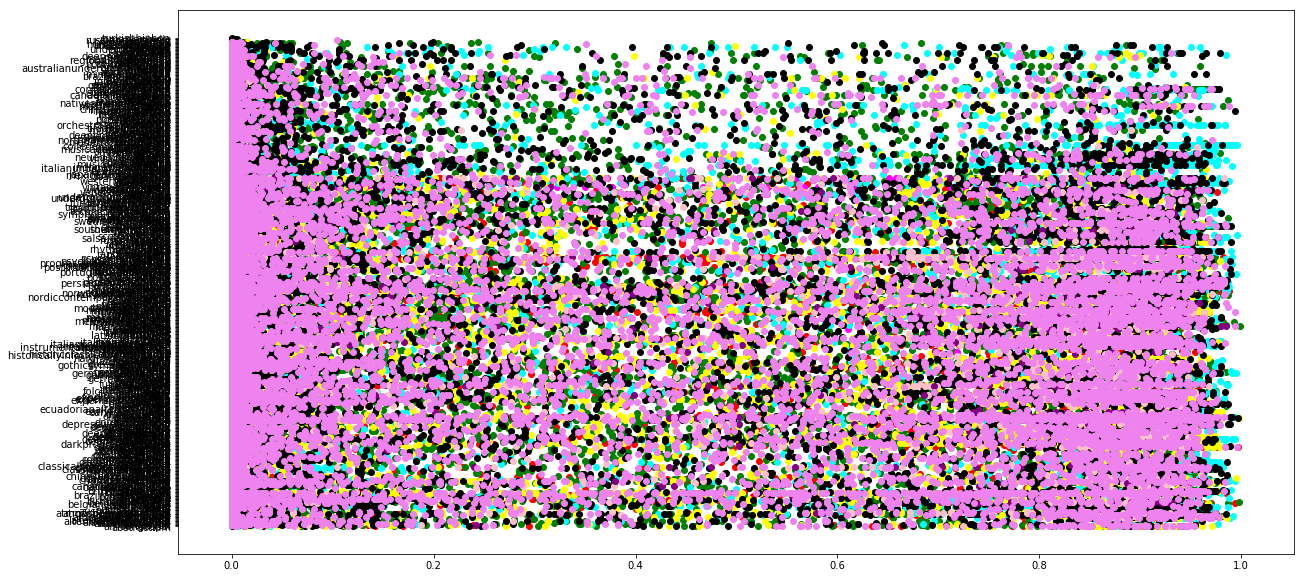

In [60]:
plt.scatter(df1.Instrumentalness, df1.Genre, color='red')
plt.scatter(df2.Instrumentalness, df2.Genre, color='green')
plt.scatter(df3.Instrumentalness, df3.Genre, color='blue')
plt.scatter(df4.Instrumentalness, df4.Genre, color='magenta')
plt.scatter(df5.Instrumentalness, df5.Genre, color='cyan')
plt.scatter(df6.Instrumentalness, df6.Genre, color='yellow')
plt.scatter(df7.Instrumentalness, df7.Genre, color='black')
plt.scatter(df8.Instrumentalness, df8.Genre, color='pink')
plt.scatter(df9.Instrumentalness, df9.Genre, color='purple')
plt.scatter(df10.Instrumentalness, df10.Genre, color='violet')
plt.show()